In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [123]:
intclusts = pd.read_csv("../exp/adjusted_distributions_intclust.csv", index_col = 0, sep=",")
gsea = pd.read_csv("../exp/reactome_2019_GSEA.csv", index_col=0)

In [124]:
gsea

,IntClust 1,IntClust 2,IntClust 3,IntClust 4ER+,IntClust 4ER-,IntClust 5,IntClust 6,IntClust 7,IntClust 8,IntClust 9,IntClust 10
Term,,,,,,,,,,,
Assembly of collagen fibrils and other multimeric structures,1.049036,5.000000,0.974275,1.091789,1.454413,1.290681,2.389189,2.155206,1.311014,1.247610,0.281180
Collagen formation,1.065845,5.000000,0.921247,1.106857,1.371030,1.318862,1.864748,2.489428,2.139396,1.042726,0.533042
ERCC6 (CSB) and EHMT2 (G9a) positively regulate rRNA expression,5.000000,5.000000,0.702047,3.921659,1.824260,0.681053,0.947119,0.882207,0.158313,1.426278,0.228067
Extracellular matrix organization,1.039957,5.000000,0.569958,1.174228,1.392991,1.793119,1.433723,2.560484,1.983980,1.124677,0.297436
Formation of the beta-catenin:TCF transactivating complex,5.000000,5.000000,0.333310,1.551012,1.056790,0.327395,1.368881,1.455199,0.159023,0.498590,0.211528
...,...,...,...,...,...,...,...,...,...,...,...
Fatty Acids bound to GPR40 (FFAR1) regulate insulin secretion,0.027351,0.002196,0.060462,0.159961,0.266451,0.514934,0.167321,0.061277,0.094445,0.292981,0.020899
Organic anion transport,0.024356,0.001971,0.075464,0.337015,0.161653,0.077474,0.029717,0.004938,0.270932,0.484075,0.025738
EGFR interacts with phospholipase C-gamma,0.214723,0.001959,0.945263,0.295748,0.829582,0.863329,0.103600,2.376585,1.111008,0.062164,0.941156


In [125]:
new_name = {}
for i in intclusts.columns:
    if i != 'cluster 4ER- log adjusted q-value':
        new_i = i.lstrip('cluster ')
        new_i = new_i.rstrip(' log adjusted q-value')
    else:
        new_i = '4ER-'
    new_name[i] = new_i
intclusts = intclusts.rename(columns = new_name)
intclusts

,4ER+,9,7,3,8,10,1,2,5,4ER-,6
RMTs methylate histone arginines,0.758568,0.054406,0.039849,0.099775,0.075451,0.327460,18.721794,0.365473,0.018053,0.139626,0.020571
HDMs demethylate histones,0.466298,0.091224,0.150271,0.224870,0.049012,0.165633,17.008346,0.378548,0.030516,0.029626,0.020571
Senescence-Associated Secretory Phenotype (SASP),0.835548,0.064950,0.037017,0.049357,0.075451,0.326805,16.956480,0.270782,0.007901,0.177529,0.020162
Cellular Senescence,1.233537,0.175954,0.277561,0.242471,0.081375,0.036483,16.956480,0.058689,0.027167,0.211400,0.020571
Nucleosome assembly,1.503196,0.123956,0.112440,0.087088,0.078105,0.084186,16.721409,0.127614,0.002992,0.396395,0.020571
...,...,...,...,...,...,...,...,...,...,...,...
phospho-PLA2 pathway,0.130170,0.004654,0.175178,0.067441,0.110972,0.054425,0.001189,0.524331,0.011144,0.424767,0.007124
"Gamma carboxylation, hypusine formation and arylsulfatase activation",0.585604,0.196309,1.572381,0.205893,0.814993,0.218627,0.000854,0.185032,0.188570,0.567200,0.014141
Signal regulatory protein family interactions,1.556170,0.123956,0.730298,0.208476,0.962233,0.190589,0.000661,0.062681,0.040868,2.501311,0.020571
Scavenging by Class B Receptors,0.952911,0.316602,0.092131,0.093823,0.136931,0.128289,0.000211,0.168478,0.137528,0.058631,0.000263


In [126]:
def read_reactome(file_name, gene_name_start = "ENSG0"):
    df = pd.read_csv(file_name, sep='\t', header=None)

    if gene_name_start == None:
        sub_df = df
    else:
        subset_vec = df[0].str.startswith(gene_name_start)
        sub_df = df.loc[subset_vec]

    genes_df = sub_df.groupby(1)[0].apply(list)
    names_df = sub_df.groupby(1)[3].max()

    out_df = pd.concat([genes_df,names_df], axis=1)
    out_df.columns = ['genes', 'pathway_name']
    out_df.index = out_df.pathway_name

    return out_df
reactome_ngenes = read_reactome("../data/Ensembl2Reactome_All_Levels.txt.gz")
length_dict = {}
for i in intclusts.index:
        if i in reactome_ngenes.index:
            nr_genes = len(reactome_ngenes.loc[i, "genes"])
        else:
            print(f'{i} not found')

        length_dict[i] = nr_genes

In [127]:
intclusts["ngenes"] = intclusts.index.map(length_dict)
gsea["ngenes"] = gsea.index.map(length_dict)

In [128]:
intclusts

,4ER+,9,7,3,8,10,1,2,5,4ER-,6,ngenes
RMTs methylate histone arginines,0.758568,0.054406,0.039849,0.099775,0.075451,0.327460,18.721794,0.365473,0.018053,0.139626,0.020571,81
HDMs demethylate histones,0.466298,0.091224,0.150271,0.224870,0.049012,0.165633,17.008346,0.378548,0.030516,0.029626,0.020571,50
Senescence-Associated Secretory Phenotype (SASP),0.835548,0.064950,0.037017,0.049357,0.075451,0.326805,16.956480,0.270782,0.007901,0.177529,0.020162,123
Cellular Senescence,1.233537,0.175954,0.277561,0.242471,0.081375,0.036483,16.956480,0.058689,0.027167,0.211400,0.020571,221
Nucleosome assembly,1.503196,0.123956,0.112440,0.087088,0.078105,0.084186,16.721409,0.127614,0.002992,0.396395,0.020571,75
...,...,...,...,...,...,...,...,...,...,...,...,...
phospho-PLA2 pathway,0.130170,0.004654,0.175178,0.067441,0.110972,0.054425,0.001189,0.524331,0.011144,0.424767,0.007124,2
"Gamma carboxylation, hypusine formation and arylsulfatase activation",0.585604,0.196309,1.572381,0.205893,0.814993,0.218627,0.000854,0.185032,0.188570,0.567200,0.014141,42
Signal regulatory protein family interactions,1.556170,0.123956,0.730298,0.208476,0.962233,0.190589,0.000661,0.062681,0.040868,2.501311,0.020571,18
Scavenging by Class B Receptors,0.952911,0.316602,0.092131,0.093823,0.136931,0.128289,0.000211,0.168478,0.137528,0.058631,0.000263,9


In [129]:
gsea

,IntClust 1,IntClust 2,IntClust 3,IntClust 4ER+,IntClust 4ER-,IntClust 5,IntClust 6,IntClust 7,IntClust 8,IntClust 9,IntClust 10,ngenes
Term,,,,,,,,,,,,
Assembly of collagen fibrils and other multimeric structures,1.049036,5.000000,0.974275,1.091789,1.454413,1.290681,2.389189,2.155206,1.311014,1.247610,0.281180,65.0
Collagen formation,1.065845,5.000000,0.921247,1.106857,1.371030,1.318862,1.864748,2.489428,2.139396,1.042726,0.533042,95.0
ERCC6 (CSB) and EHMT2 (G9a) positively regulate rRNA expression,5.000000,5.000000,0.702047,3.921659,1.824260,0.681053,0.947119,0.882207,0.158313,1.426278,0.228067,83.0
Extracellular matrix organization,1.039957,5.000000,0.569958,1.174228,1.392991,1.793119,1.433723,2.560484,1.983980,1.124677,0.297436,439.0
Formation of the beta-catenin:TCF transactivating complex,5.000000,5.000000,0.333310,1.551012,1.056790,0.327395,1.368881,1.455199,0.159023,0.498590,0.211528,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Fatty Acids bound to GPR40 (FFAR1) regulate insulin secretion,0.027351,0.002196,0.060462,0.159961,0.266451,0.514934,0.167321,0.061277,0.094445,0.292981,0.020899,15.0
Organic anion transport,0.024356,0.001971,0.075464,0.337015,0.161653,0.077474,0.029717,0.004938,0.270932,0.484075,0.025738,5.0
EGFR interacts with phospholipase C-gamma,0.214723,0.001959,0.945263,0.295748,0.829582,0.863329,0.103600,2.376585,1.111008,0.062164,0.941156,9.0


In [130]:
intclusts.sort_values(by="ngenes", ascending = False).iloc[:50]

,4ER+,9,7,3,8,10,1,2,5,4ER-,6,ngenes
Signal Transduction,0.243899,0.084280,2.459088,0.128572,0.837105,0.842876,0.169366,0.042089,0.049644,0.662266,0.007124,3731
Immune System,0.587140,0.084541,1.575282,0.040129,1.151754,0.866024,0.087527,0.042089,0.063918,2.292165,0.020571,3212
Metabolism of proteins,0.103895,0.020460,0.591383,0.020282,0.008824,0.027427,0.100790,0.155379,0.093373,0.052772,0.020571,2554
Metabolism,0.010855,0.020592,1.388618,0.087088,0.160610,0.264892,0.087527,0.058689,0.076115,0.055659,0.020162,2445
Gene expression (Transcription),0.083488,0.000613,0.539987,0.086381,0.042057,0.007566,0.251763,0.167113,0.155405,0.271635,0.020571,2039
RNA Polymerase II Transcription,0.046944,0.008609,0.542674,0.064689,0.039071,0.031064,0.235373,0.163970,0.097351,0.544993,0.020571,1799
Post-translational protein modification,0.186513,0.032995,0.994733,0.094210,0.042884,0.080681,0.094315,0.382388,0.117796,0.209273,0.020571,1638
Generic Transcription Pathway,0.048281,0.015725,0.623844,0.054201,0.042884,0.007174,0.161790,0.258770,0.083192,0.333362,0.020571,1586
Innate Immune System,0.674116,0.019320,1.922656,0.024884,1.148671,0.763025,0.079099,0.047002,0.085296,2.122169,0.020571,1569
Developmental Biology,0.036323,0.002992,0.860092,0.076791,0.097389,0.190589,0.044076,0.027010,0.158697,0.097889,0.020162,1469


In [131]:
print(intclusts['ngenes'].mean(axis=0))
print(intclusts["ngenes"].median(axis=0))


68.42092574734812
22.0


In [132]:
comparison_df_index = [x for x in intclusts.columns if x != "ngenes"] 
print(comparison_df_index)
comparison_df = pd.DataFrame(index=comparison_df_index)
anova_mean = []
gsea_mean = []
anova_median = []
gsea_median = []
no_anova_genes = []
no_gsea_genes = []
for i in intclusts.columns:
    if i != "ngenes":
        anova_mean.append(intclusts[intclusts[i] > 3]['ngenes'].mean(axis=0))
        no_anova_genes.append(intclusts[intclusts[i] > 3]["ngenes"].shape[0])
        gsea_mean.append(gsea[gsea[f"IntClust {i}"] > 3]["ngenes"].mean(axis=0))
        no_gsea_genes.append(gsea[gsea[f"IntClust {i}"] > 3]["ngenes"].shape[0])
        anova_median.append(intclusts[intclusts[i] > 3]['ngenes'].median(axis=0))
        gsea_median.append(gsea[gsea[f"IntClust {i}"] > 3]["ngenes"].median(axis=0))

comparison_df["ANOVA pathways"] = no_anova_genes

comparison_df["GSEA pathways"] = no_gsea_genes
comparison_df["ANOVA median"] = anova_median
comparison_df["GSEA median"] = gsea_median
comparison_df["Fold change"] = comparison_df["GSEA median"] / comparison_df["ANOVA median"]

        
comparison_df


['4ER+', '9', '7', '3', '8', '10', '1', '2', '5', '4ER-', '6']


,ANOVA pathways,GSEA pathways,ANOVA median,GSEA median,Fold change
4ER+,150,191,25.0,77.0,3.080000
9,14,9,15.0,41.0,2.733333
7,65,105,45.0,93.0,2.066667
3,126,85,33.5,44.0,1.313433
8,1,51,8.0,145.0,18.125000
10,170,88,40.0,75.5,1.887500
1,254,193,62.0,87.0,1.403226
2,6,29,53.0,83.0,1.566038
5,37,5,13.0,2554.0,196.461538
4ER-,21,21,39.0,91.0,2.333333


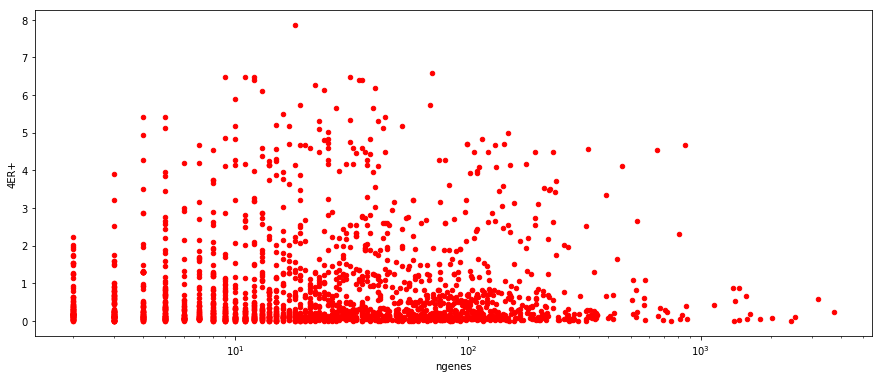

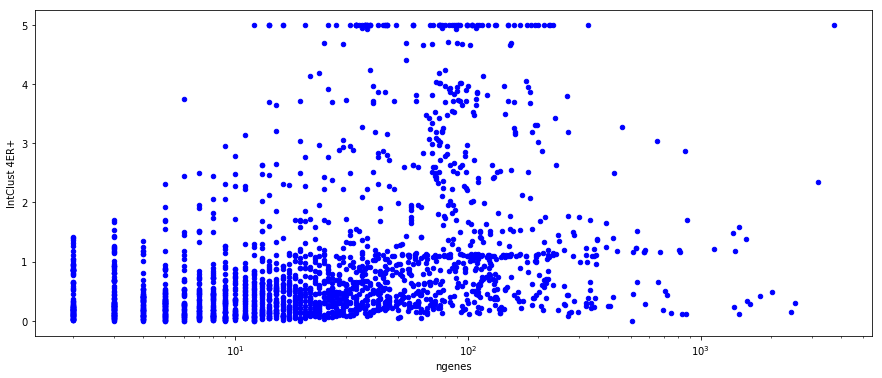

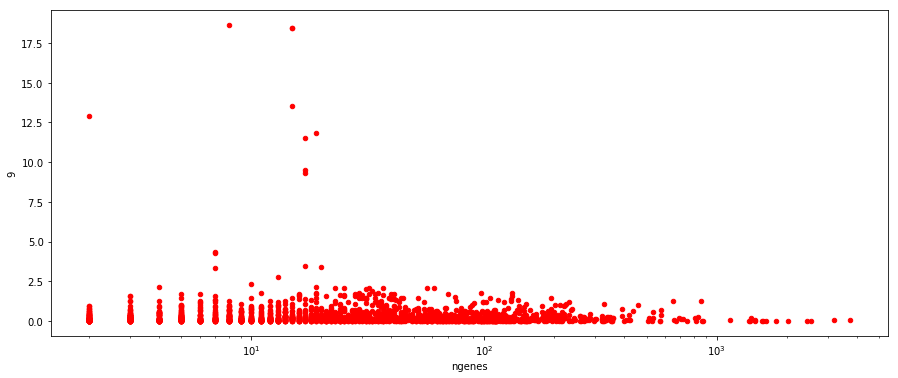

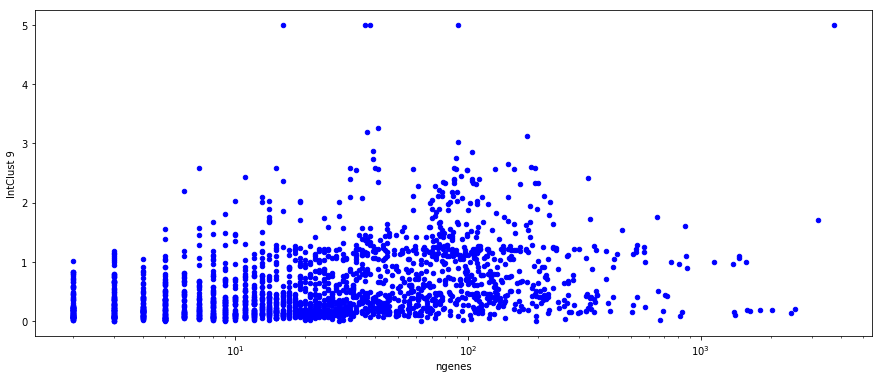

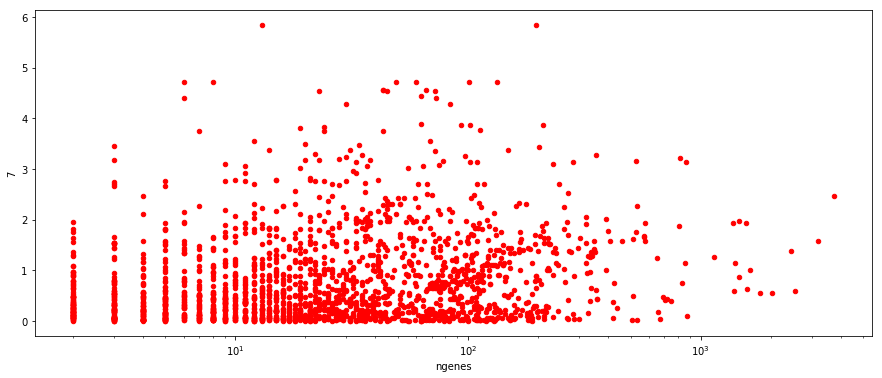

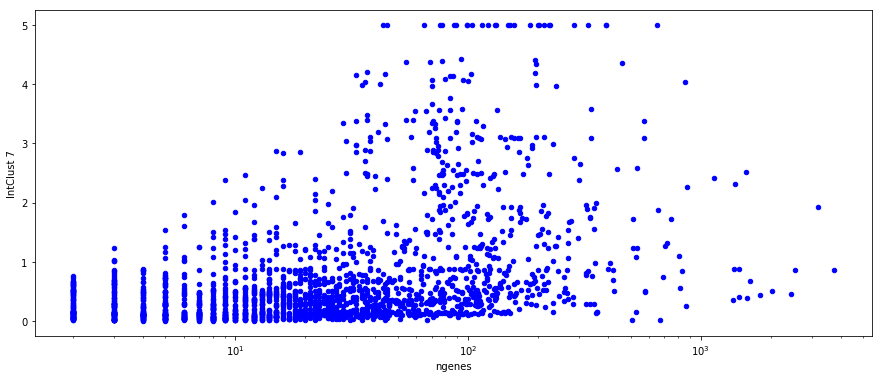

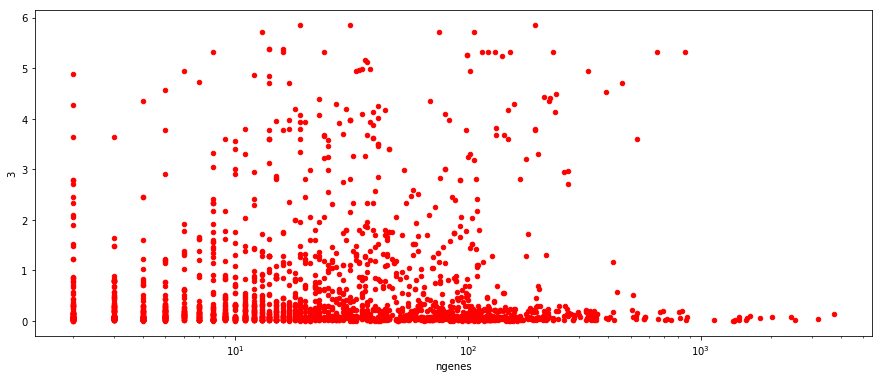

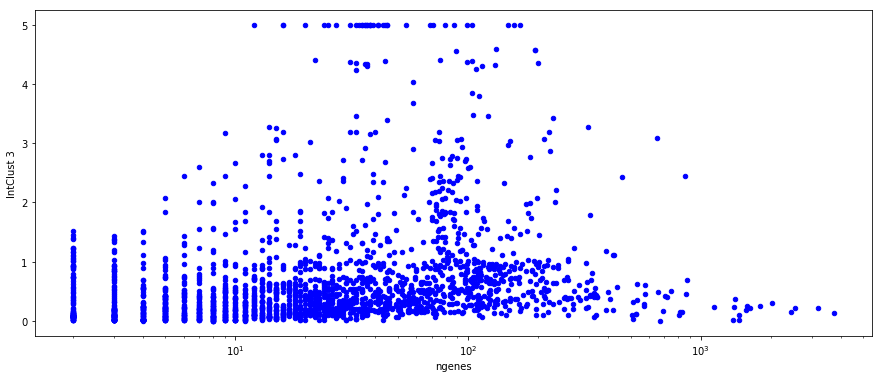

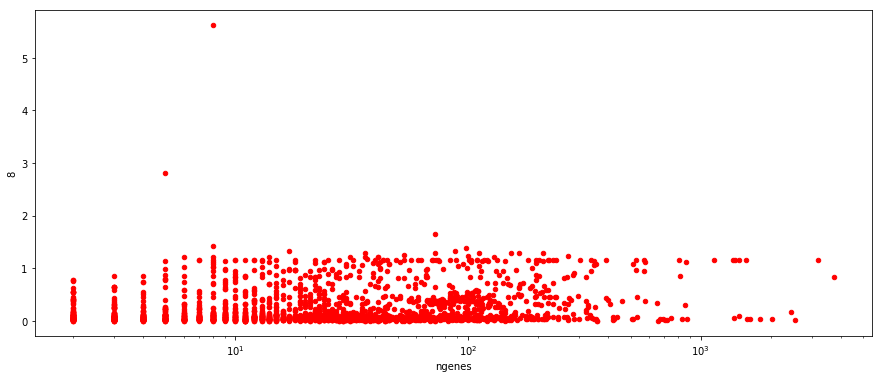

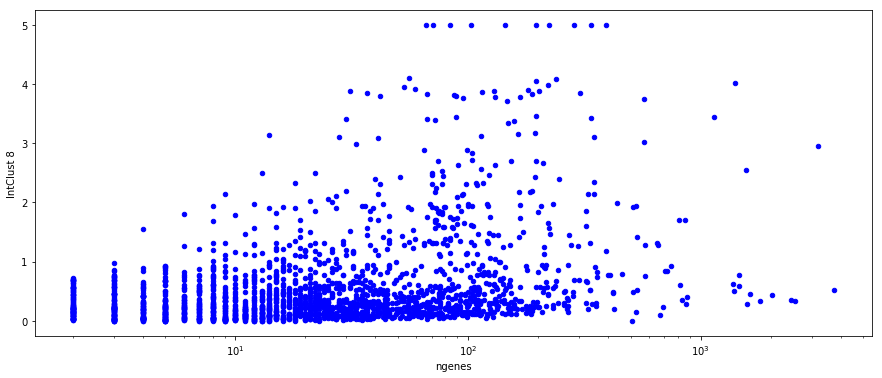

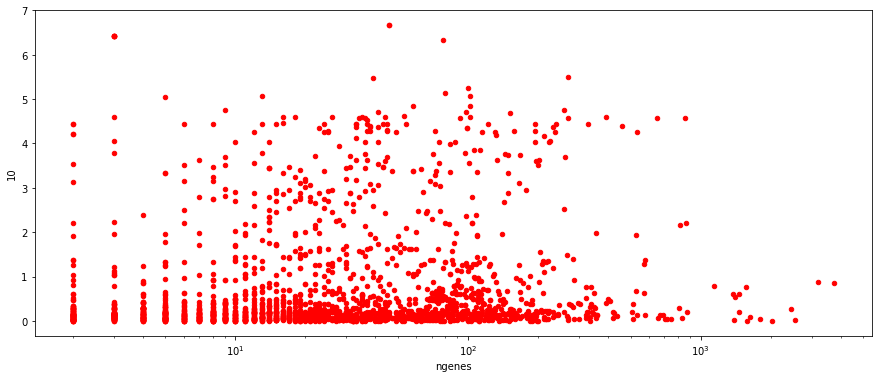

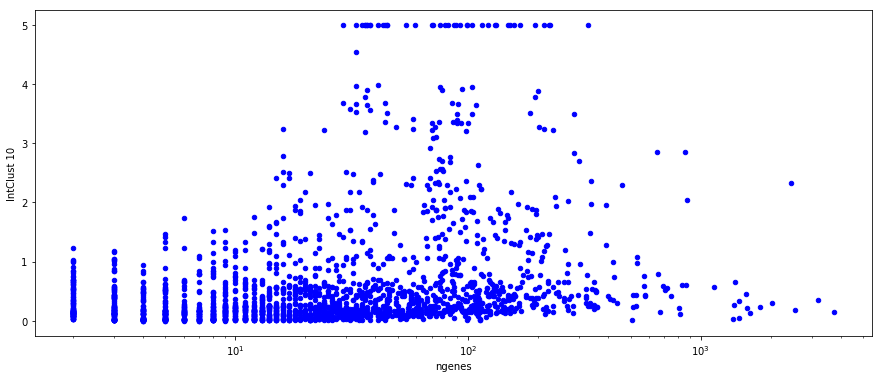

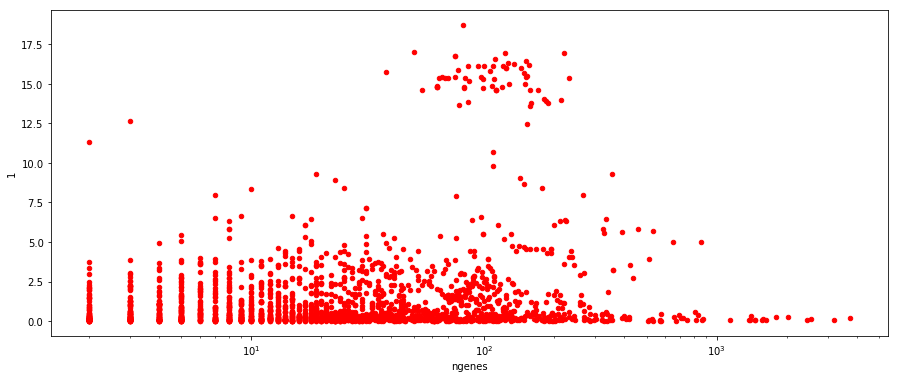

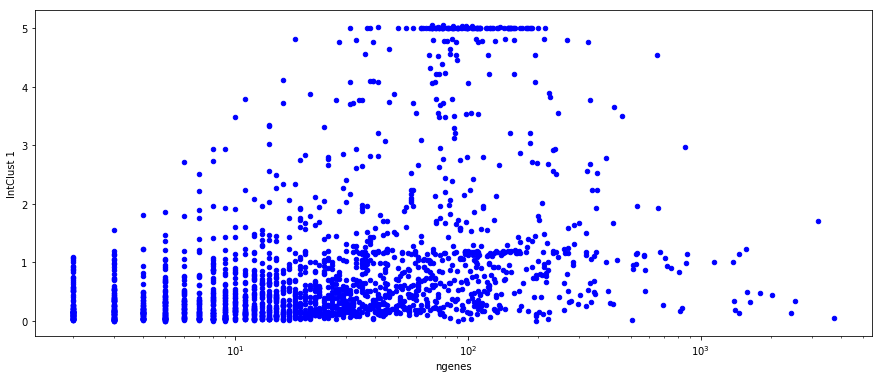

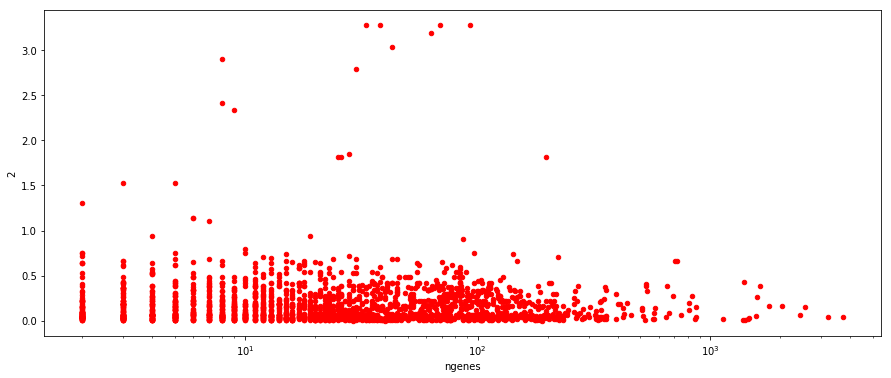

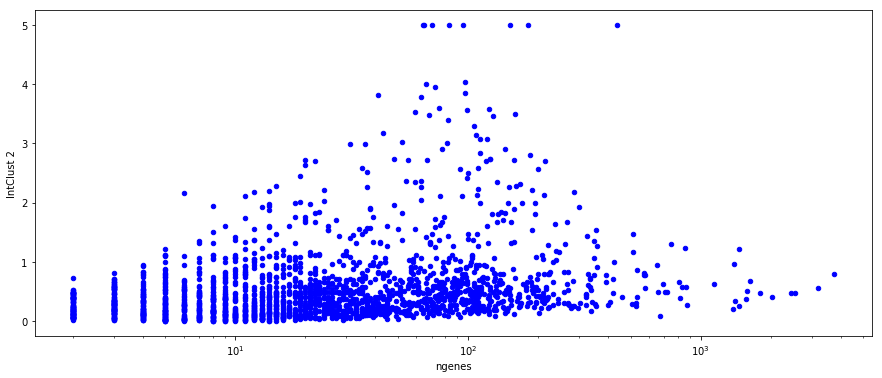

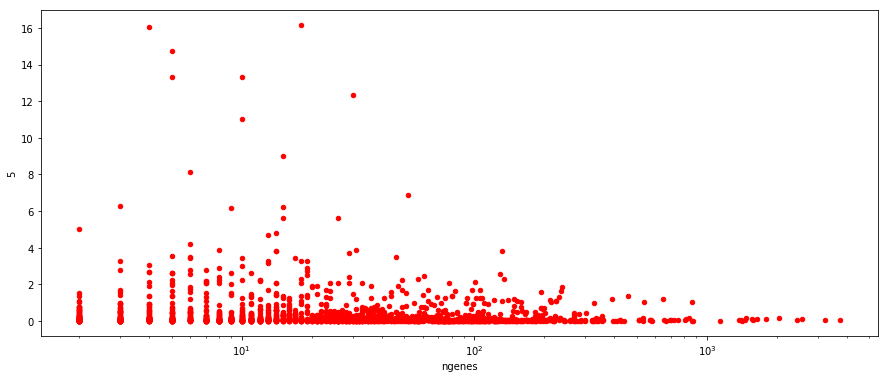

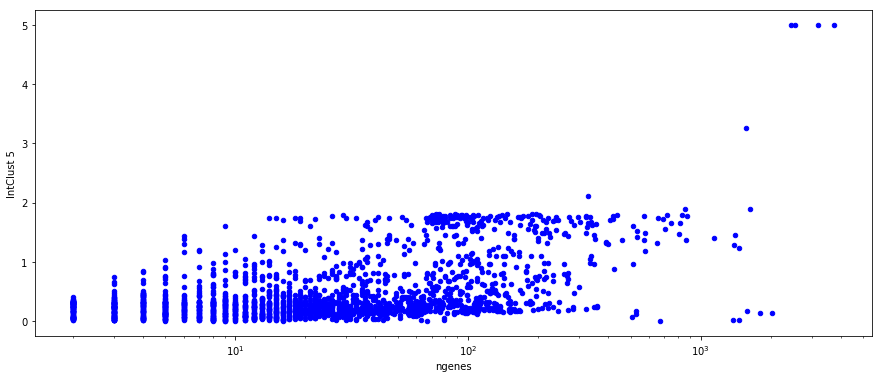

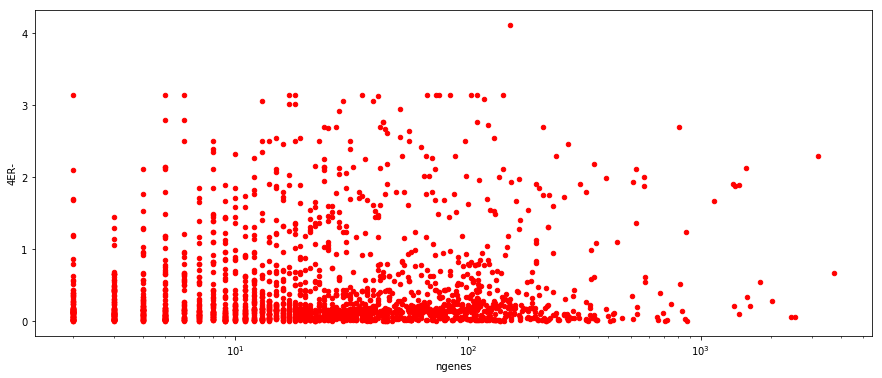

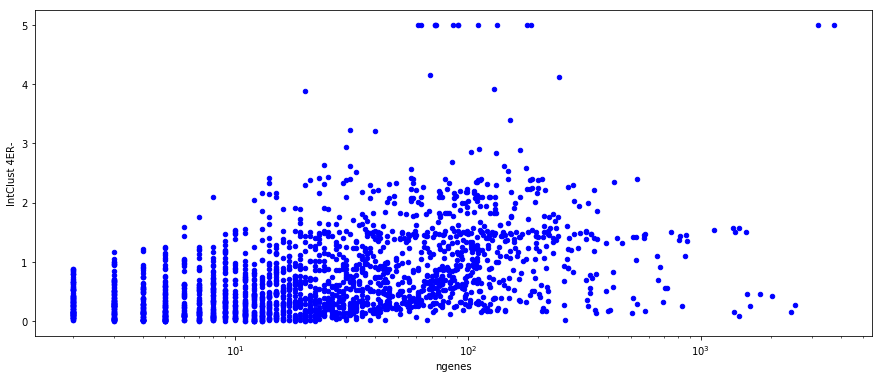

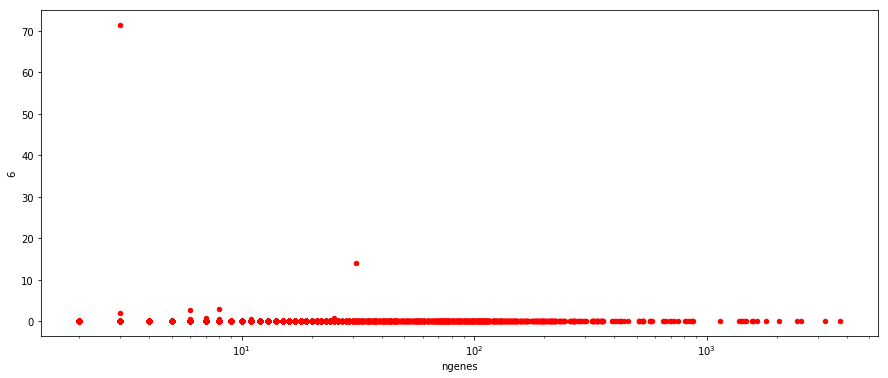

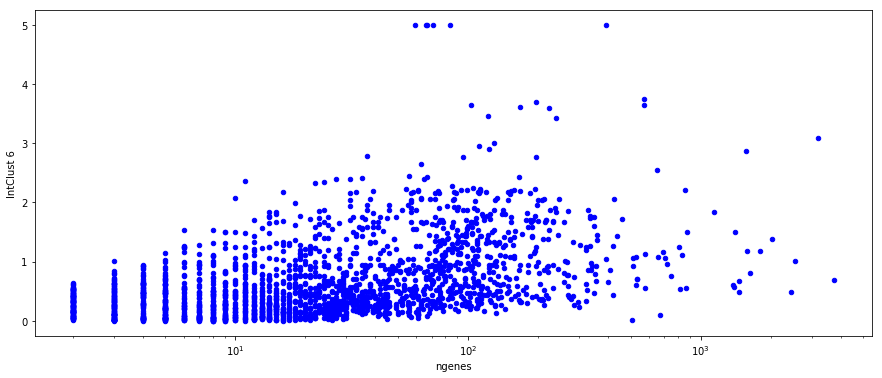

In [133]:
for i in intclusts.columns:
    if i != "ngenes":
        intclusts.plot.scatter(x="ngenes", y=i, color="red", figsize=(15, 6))
        plt.xscale("log")
        plt.show()
        gsea.plot.scatter(x="ngenes", y=f"IntClust {i}", color="blue", figsize=(15, 6))
        plt.xscale("log")
        plt.show()